## Quickstart
This quickstart document will demonstrate the basic usage of tagreader from importing the package to making a plot.

Start by importing the package:

In [1]:
import tagreader

If we don't know the name of the server, we can check which PI and IP.21 servers we have access to:

In [2]:
print(tagreader.list_pi_servers())

['ims-pors-01', 'JSV', 'ONO-IMS', 'PIMAM', 'PINO', 'SLP', 'st-w1026', 'st-w1027', 'st-w1028']


Similarly we could have typed `tagreader.list_aspen_servers()` to get a list of available Aspen InfoPlus.21 servers.

Let's define a connection to PINO. We need to specify that PINO is a PI server. Available types are `pi`, `ip21` (or `aspen`), all case-insensitive.

In [3]:
c = tagreader.IMSClient('PINO', 'pi')

By default a cache-file using the HDF5 file format will be created to store previously read data values. The cache can speed up subsequent reads by a decade or two, and is therefore highly recommended. If, for any reason, you want to disable the cache, set it to `None` before making the connection:

In [4]:
c.cache = None

We can now establish a connection to the server:

In [5]:
c.connect()

After connecting, we can search for a tag. `%` and `*` are valid and equivalent wildcards:

In [6]:
print(c.search_tag('ba:*'))

[('BA:ACTIVE.1', 'Batch Active Reactor 1'), ('BA:CONC.1', 'Concentration Reactor 1'), ('BA:LEVEL.1', 'Level Reactor 1'), ('BA:PHASE.1', 'Phase Reactor 1'), ('BA:TEMP.1', 'Temperature Reactor 1')]


We can also search for a description:

In [7]:
print(c.search_tag('cd*158'))

[('CDEP158', 'Light Naphtha End Point'), ('CDM158', 'Light Naphtha End Point Control'), ('CDT158', 'Atmospheric Tower OH Vapor')]


Or both tag and description, which returns those that fulfill both requirements:

In [8]:
print(c.search_tag(tag='cd*158', desc='*Naphtha*'))

[('CDEP158', 'Light Naphtha End Point'), ('CDM158', 'Light Naphtha End Point Control')]


Now that we know the tag name, we can read values for a duration of 3.5 hours starting January 5th at 8 in the morning with 3-minute (180-seconds) intervals. The default query method is interpolated. Timestamps are parsed using [pandas.Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html), and can therefore be provided in many different string formats.

In [9]:
df = c.read_tags(['BA:ACTIVE.1', 'BA:LEVEL.1', 'BA:CONC.1'], '05-Jan-2020 08:00:00', '05/01/20 11:30am', 180)

*Note*: Tags with maps (relevant for some InfoPlus.21 servers) can be specified on the form `'tag;map'`, e.g. `'17B-HIC192;CS A_AUTO'`.

The result from the last call is a Pandas dataframe, and can be manipulated as such:

In [10]:
df.tail()

BA:ACTIVE.1  BA:LEVEL.1  BA:CONC.1
time                                                         
2020-01-05 11:18:00+01:00          1.0   42.256237  30.078449
2020-01-05 11:21:00+01:00          1.0   41.894955  31.007982
2020-01-05 11:24:00+01:00          1.0   41.533672  31.937513
2020-01-05 11:27:00+01:00          1.0   41.172394  36.159206
2020-01-05 11:30:00+01:00          1.0   39.583984  40.987350

In [11]:
df['BA:LEVEL.1'].size

71

In [12]:
df['BA:CONC.1'].loc['2020-01-05 11:24:00']

31.93751335144043

In [13]:
max(df['BA:LEVEL.1'])

42.2562370300293

etc...

Sometimes it can be handy to obtain the unit and description for the three tags:

In [14]:
tags = ['BA:ACTIVE.1', 'BA:LEVEL.1', 'BA:CONC.1']
units = c.get_units(tags)
desc = c.get_descriptions(tags)
print(units)
print(desc)

{'BA:ACTIVE.1': 'STATE', 'BA:LEVEL.1': '', 'BA:CONC.1': 'DEG. C'}
{'BA:ACTIVE.1': 'Batch Active Reactor 1', 'BA:LEVEL.1': 'Level Reactor 1', 'BA:CONC.1': 'Concentration Reactor 1'}


Text(0, 0.5, 'DEG. C')

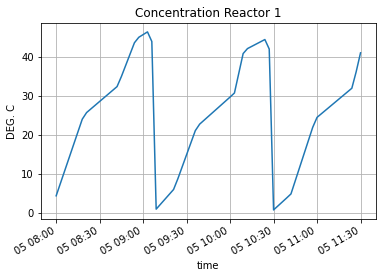

In [15]:
import matplotlib.pyplot as plt
tag = 'BA:CONC.1'
df[tag].plot(grid=True, title=desc[tag]).set_ylabel(units[tag])